In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data = pd.read_csv('athlete_events.csv')
data.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


1. Сколько раз за современную историю проводились зимние и летние олимпийские игры до 2016 года включительно?

In [43]:
seasons_counts = data[data['Year'] <= 2016].groupby('Season')['Year'].nunique()
print(f"   Летние: {seasons_counts.get('Summer', 0)} раз")
print(f"   Зимние: {seasons_counts.get('Winter', 0)} раз\n")

   Летние: 29 раз
   Зимние: 22 раз



2. Список спортсменов, первыми завоевавших золото в керлинге

In [44]:
curling_first_gold = data[(data['Sport'] == 'Curling') & (data['Medal'] == 'Gold')].sort_values('Year').head(5)
for idx, row in curling_first_gold.iterrows():
    print(f"   {row['Name']} - {row['Year']} ({row['Team']})")

   Robin Welsh - 1924 (Great Britain)
   Thomas Blackwood "Tom" Murray - 1924 (Great Britain)
   William Kilgour "Willie" Jackson - 1924 (Great Britain)
   Laurence Jackson - 1924 (Great Britain)
   Sandra Marie Schmirler (-Peterson-) - 1998 (Canada)


3. Сколько олимпийских чемпионов-золотых медалистов команды России завоевали свои медали в Сочи 2014 года?

In [45]:
russia_gold_sochi = data[(data['Year'] == 2014) & (data['Team'].isin(['Russia', 'Russian Federation'])) & (data['Medal'] == 'Gold')]
unique_gold_medalists = russia_gold_sochi['Name'].nunique()
print(f"\nКоличество золотых медалистов России в Сочи 2014: {unique_gold_medalists}\n")


Количество золотых медалистов России в Сочи 2014: 22



4. Сравнение количества медалей России (СССР) и США в процентном отношении в Сочи 2014 и Москве 1980

In [46]:
def get_medal_percentage(year, teams):
    # Медали команд в указанном году
    team_data = data[(data['Year'] == year) & (data['Team'].isin(teams)) & (data['Medal'].notna())]
    # Все медали в указанном году
    total_medals = data[(data['Year'] == year) & (data['Medal'].notna())].shape[0]
    team_medals = team_data.shape[0]
    return (team_medals / total_medals * 100) if total_medals > 0 else 0

russia_teams = ['Russia', 'Soviet Union', 'Russian Federation']
usa_teams = ['United States']

sochi_russia = get_medal_percentage(2014, russia_teams)
sochi_usa = get_medal_percentage(2014, usa_teams)
moscow_russia = get_medal_percentage(1980, russia_teams)
moscow_usa = get_medal_percentage(1980, usa_teams)

print("4. Процентное отношение медалей:")
print(f"   Сочи 2014 - Россия: {sochi_russia:.1f}%, США: {sochi_usa:.1f}%")
print(f"   Москва 1980 - Россия/СССР: {moscow_russia:.1f}%, США: {moscow_usa:.1f}%\n")

4. Процентное отношение медалей:
   Сочи 2014 - Россия: 9.4%, США: 8.7%
   Москва 1980 - Россия/СССР: 30.5%, США: 1.9%



5. Сводная диаграмма распределения спортсменов по возрасту за всю историю

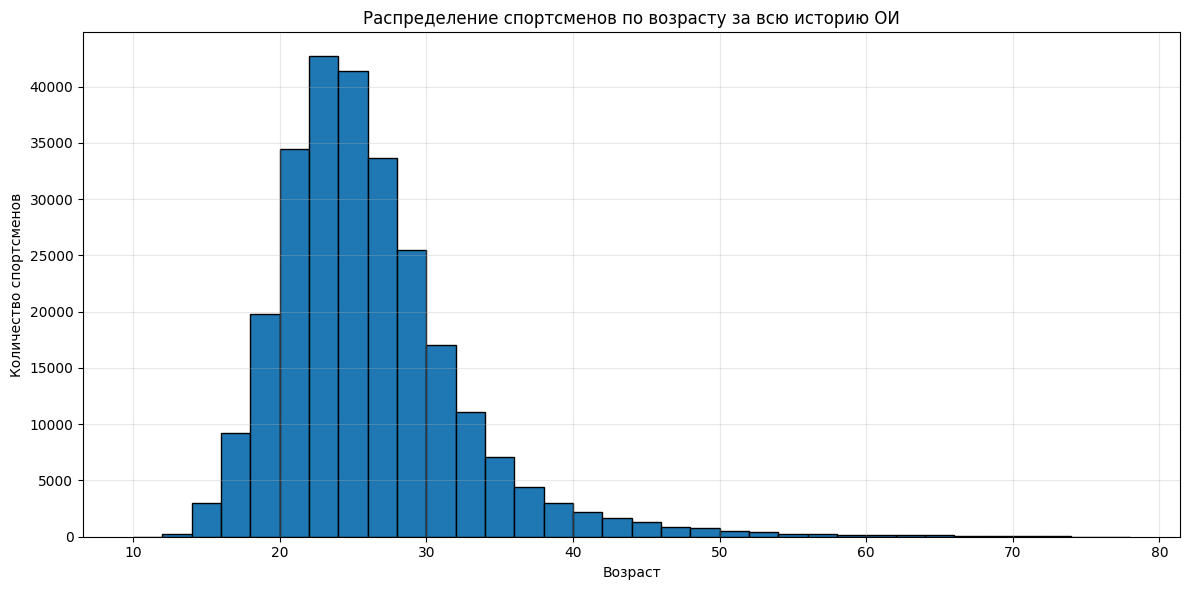

In [47]:
plt.figure(figsize=(12, 6))
data['Age'].hist(bins=range(10, 80, 2), edgecolor='black')
plt.title('Распределение спортсменов по возрасту за всю историю ОИ')
plt.xlabel('Возраст')
plt.ylabel('Количество спортсменов')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


Основной возрастной диапазон: 20-30 лет (пик приходится на 24-26 лет)

Ранний старт: Значительное количество спортсменов начинают карьеру в 16-18 лет

Долголетие: Небольшое, но заметное количество спортсменов старше 40 лет

Редкость: Спортсмены старше 50 лет - исключение

6. Круговая диаграмма по гендерному признаку спортсменов

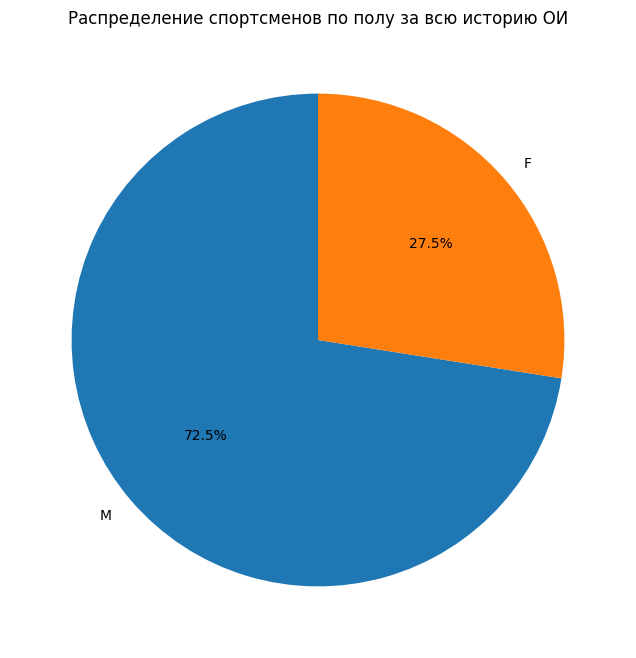

In [48]:
gender_counts = data['Sex'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Распределение спортсменов по полу за всю историю ОИ')
plt.show()

Дисбаланс: Существенное преобладание мужчин

Женщины: Составляют 27,5% от общего числа участников

Вывод: Исторически олимпийский спорт был преимущественно мужским

7. Линейный график изменения количества женщин-спортсменок

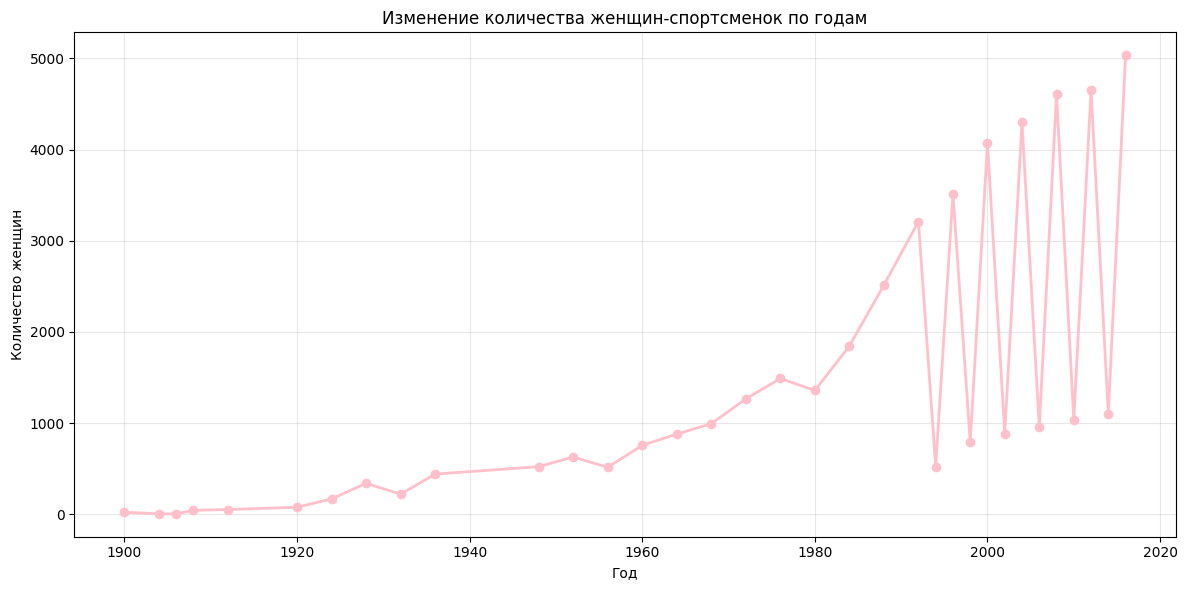

In [49]:
women_by_year = data[data['Sex'] == 'F'].groupby('Year')['ID'].nunique()
plt.figure(figsize=(12, 6))
plt.plot(women_by_year.index, women_by_year.values, marker='o', linewidth=2, color='pink')
plt.title('Изменение количества женщин-спортсменок по годам')
plt.xlabel('Год')
plt.ylabel('Количество женщин')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Постоянное увеличение числа женщин с 1900-х годов

Значительный рост после 1970-х годов (возможно, связано с феминистским движением)

В XXI веке количество женщин стабилизировалось на высоком уровне

Постепенное сокращение гендерного разрыва

8. Кольцевая диаграмма участников летних и зимних олимпийских игр

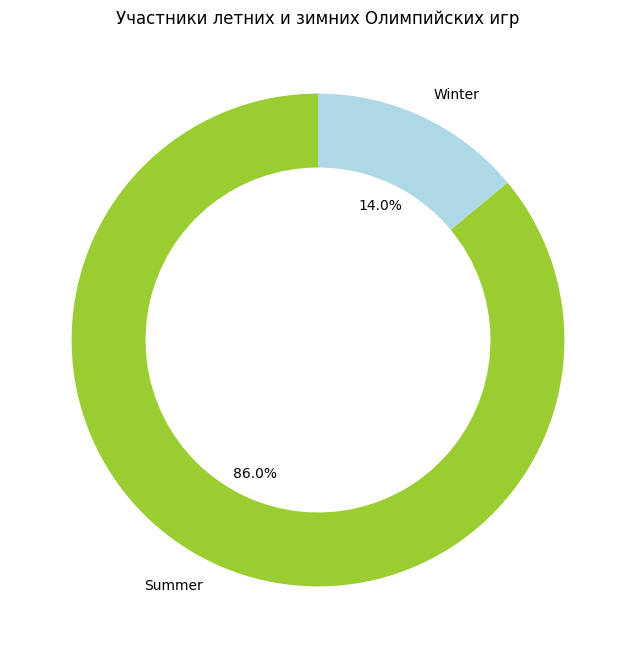

In [50]:
season_counts = data.groupby('Season')['ID'].nunique()
plt.figure(figsize=(8, 8))
plt.pie(season_counts.values, labels=season_counts.index, autopct='%1.1f%%', startangle=90, 
        colors=['yellowgreen', 'lightblue'], wedgeprops={'width': 0.3})
plt.title('Участники летних и зимних Олимпийских игр')
plt.show()

Значительно преобладают летние игры

Зимние игры составляют 14% от общего числа участников

Больше видов спорта и дисциплин в летней программе

9. Страны с наибольшим количеством медалей с учетом номинала

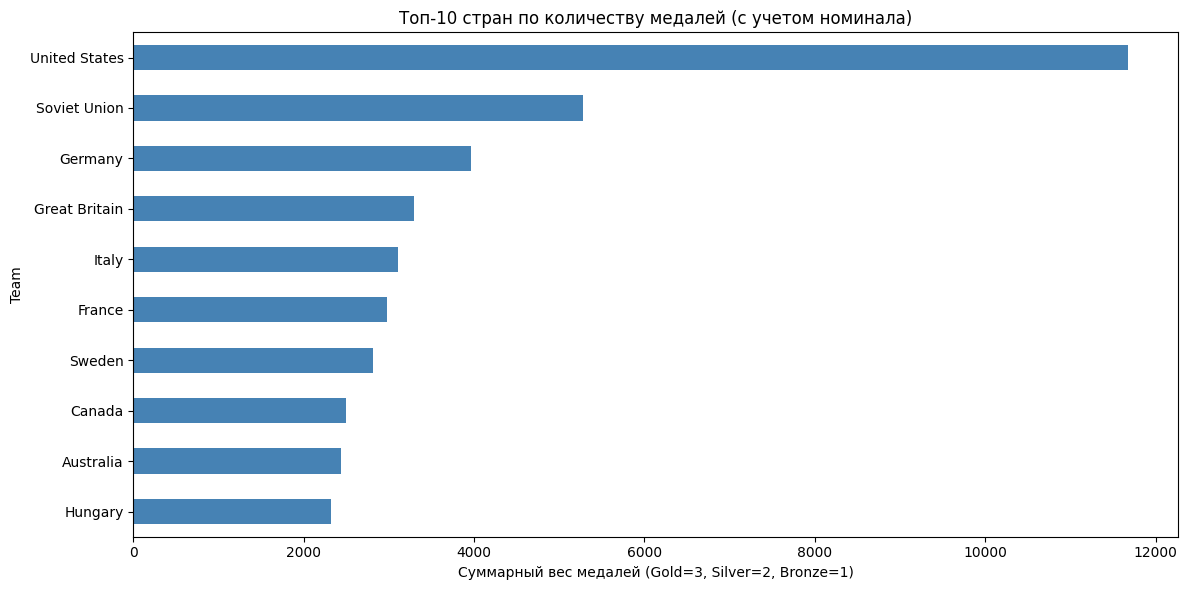

In [51]:
data['Medal_Weight'] = data['Medal'].map({'Gold': 3, 'Silver': 2, 'Bronze': 1})
medal_scores = data.groupby('Team')['Medal_Weight'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
medal_scores.sort_values().plot(kind='barh', color='steelblue')
plt.title('Топ-10 стран по количеству медалей (с учетом номинала)')
plt.xlabel('Суммарный вес медалей (Gold=3, Silver=2, Bronze=1)')
plt.tight_layout()
plt.show()

Лидеры: США, Россия/СССР, Германия, Великобритания

США явно лидируют по общему количеству медалей

Сильные позиции у Германии, Великобритании, Франции

Китай, Япония входят в топ-10

10. Кольцевая диаграмма первых 10 видов спорта по которым РФ завоевала больше всего наград в летних играх

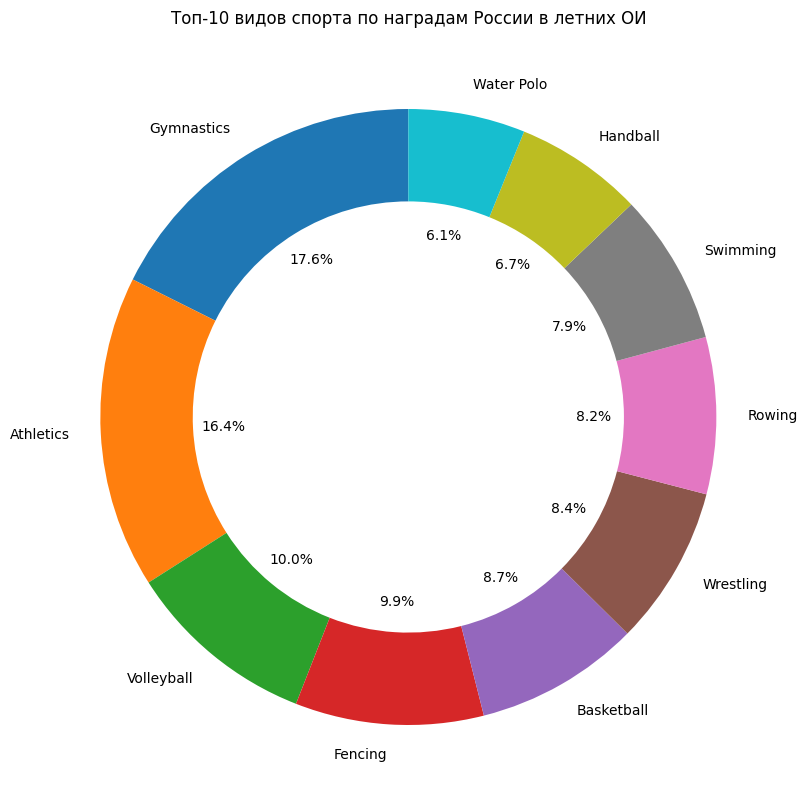

In [52]:
russia_summer = data[(data['Team'].isin(russia_teams)) & (data['Season'] == 'Summer') & (data['Medal'].notna())]
russia_sport_medals = russia_summer['Sport'].value_counts().head(10)
plt.figure(figsize=(10, 10))
plt.pie(russia_sport_medals.values, labels=russia_sport_medals.index, autopct='%1.1f%%', 
        startangle=90, wedgeprops={'width': 0.3})
plt.title('Топ-10 видов спорта по наградам России в летних ОИ')
plt.show()

Традиционные сильные виды: Гимнастика, легкая атлетика, борьба

Водные виды: Плавание, водное поло

Командные виды: Футбол, баскетбол

Вывод: Россия имеет диверсифицированную спортивную программу

11. 10-ка лучших спортсменов по количеству медалей

Для более точного подсчета учитываем уникальные медали на каждой Олимпиаде

In [53]:
athlete_medals = data[data['Medal'].notna()].groupby(['Name', 'Team', 'Games'])['Medal'].count().reset_index()
athlete_total_medals = athlete_medals.groupby(['Name', 'Team'])['Medal'].sum().reset_index()
top_athletes = athlete_total_medals.sort_values('Medal', ascending=False).head(10)
print("\n11. Топ-10 спортсменов по количеству медалей:")
for idx, row in top_athletes.iterrows():
    print(f"   {row['Name']} ({row['Team']}): {int(row['Medal'])} медалей")


11. Топ-10 спортсменов по количеству медалей:
   Michael Fred Phelps, II (United States): 28 медалей
   Larysa Semenivna Latynina (Diriy-) (Soviet Union): 18 медалей
   Nikolay Yefimovich Andrianov (Soviet Union): 15 медалей
   Ole Einar Bjrndalen (Norway): 13 медалей
   Borys Anfiyanovych Shakhlin (Soviet Union): 13 медалей
   Edoardo Mangiarotti (Italy): 13 медалей
   Takashi Ono (Japan): 13 медалей
   Paavo Johannes Nurmi (Finland): 12 медалей
   Sawao Kato (Japan): 12 медалей
   Dara Grace Torres (-Hoffman, -Minas) (United States): 12 медалей


12. Точечные диаграммы и информация о спортсменах

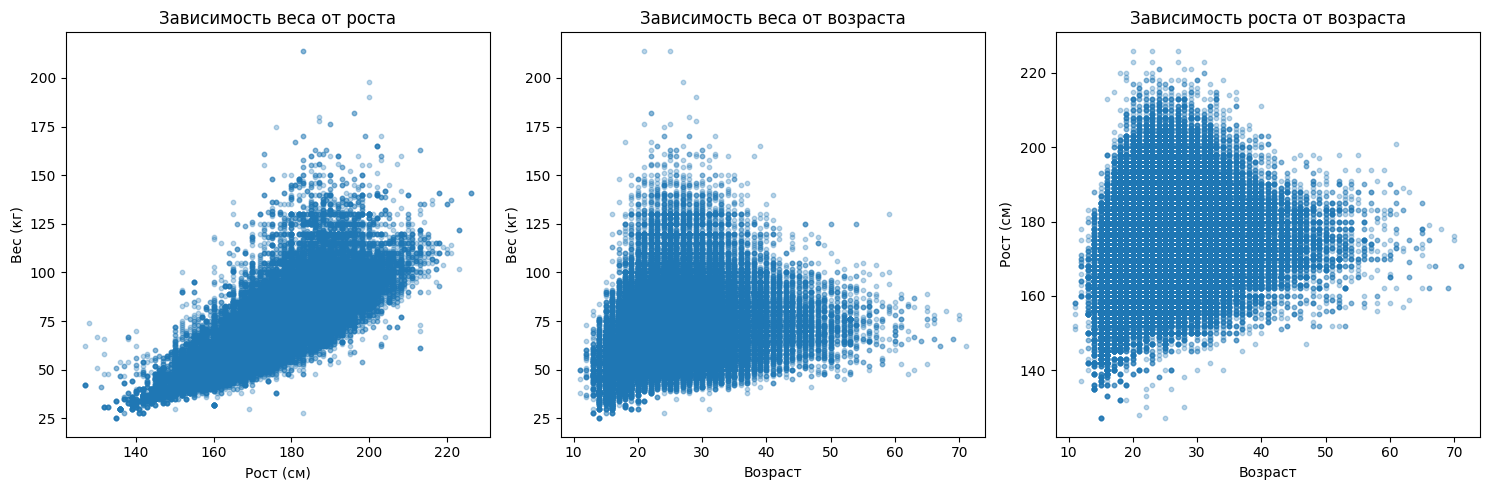


12. Самые экстремальные спортсмены:
   Самый высокий: Yao Ming (226.0 см), вид спорта: Basketball
   Самый тяжелый: Ricardo Blas, Jr. (214.0 кг), вид спорта: Judo
   Самый возрастной: John Quincy Adams Ward (97.0 лет), вид спорта: Art Competitions


In [54]:
plt.figure(figsize=(15, 5))

# Рост-вес
plt.subplot(131)
valid_data = data.dropna(subset=['Height', 'Weight'])
plt.scatter(valid_data['Height'], valid_data['Weight'], alpha=0.3, s=10)
plt.xlabel('Рост (см)')
plt.ylabel('Вес (кг)')
plt.title('Зависимость веса от роста')

# Возраст-вес
plt.subplot(132)
valid_data = data.dropna(subset=['Age', 'Weight'])
plt.scatter(valid_data['Age'], valid_data['Weight'], alpha=0.3, s=10)
plt.xlabel('Возраст')
plt.ylabel('Вес (кг)')
plt.title('Зависимость веса от возраста')

# Возраст-рост
plt.subplot(133)
valid_data = data.dropna(subset=['Age', 'Height'])
plt.scatter(valid_data['Age'], valid_data['Height'], alpha=0.3, s=10)
plt.xlabel('Возраст')
plt.ylabel('Рост (см)')
plt.title('Зависимость роста от возраста')

plt.tight_layout()
plt.show()

# Самые экстремальные спортсмены
tallest = data.loc[data['Height'].idxmax()]
heaviest = data.loc[data['Weight'].idxmax()]
oldest = data.loc[data['Age'].idxmax()]

print(f"\n12. Самые экстремальные спортсмены:")
print(f"   Самый высокий: {tallest['Name']} ({tallest['Height']} см), вид спорта: {tallest['Sport']}")
print(f"   Самый тяжелый: {heaviest['Name']} ({heaviest['Weight']} кг), вид спорта: {heaviest['Sport']}")
print(f"   Самый возрастной: {oldest['Name']} ({oldest['Age']} лет), вид спорта: {oldest['Sport']}")

Рост-Вес: Четкая линейная зависимость - чем выше спортсмен, тем больше вес

Возраст-Вес: Незначительная корреляция, вес стабилен в течение карьеры

Возраст-Рост: Отсутствие корреляции, рост не меняется с возрастом

Видны кластеры по видам спорта (баскетболисты высокие, тяжелоатлеты массивные)

13. Сводная диаграмма спортсменов-олимпийских чемпионов в возрасте более 60 лет

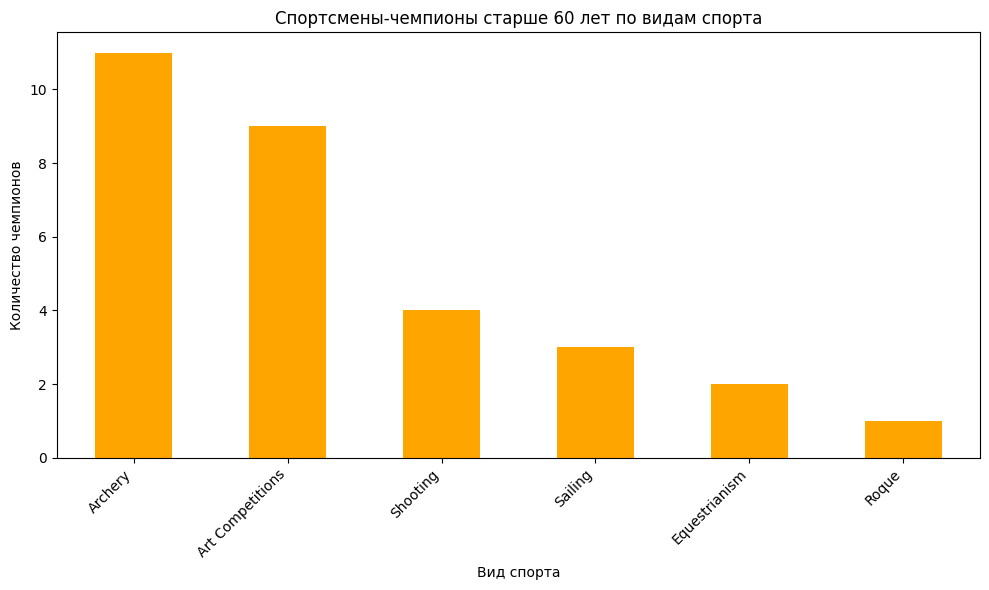

In [55]:
champions_over_60 = data[(data['Age'] > 60) & (data['Medal'].notna())]
if not champions_over_60.empty:
    plt.figure(figsize=(10, 6))
    champions_over_60['Sport'].value_counts().head(10).plot(kind='bar', color='orange')
    plt.title('Спортсмены-чемпионы старше 60 лет по видам спорта')
    plt.xlabel('Вид спорта')
    plt.ylabel('Количество чемпионов')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

Возрастные виды спорта: Конный спорт, искусство, стрельба, парусный спорт

Особенности: Эти виды не требуют пиковой физической формы

Долголетие: Возможность выступать на высоком уровне в пожилом возрасте

14. Диаграмма по видам спорта с наибольшим количеством наград у спортсменов старше 60 лет

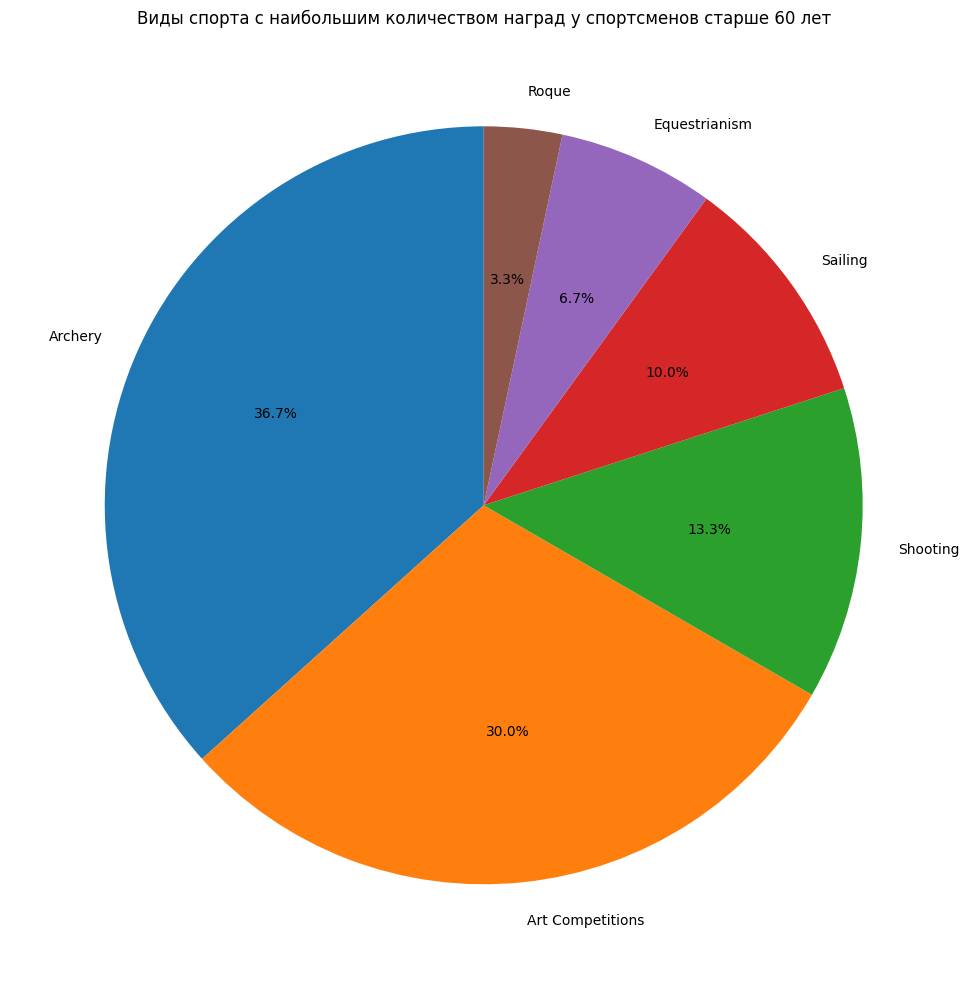

In [56]:
if not champions_over_60.empty:
    top_sports_over_60 = champions_over_60['Sport'].value_counts().head(10)
    plt.figure(figsize=(10, 10))
    plt.pie(top_sports_over_60.values, labels=top_sports_over_60.index, autopct='%1.1f%%', startangle=90)
    plt.title('Виды спорта с наибольшим количеством наград у спортсменов старше 60 лет')
    plt.tight_layout()
    plt.show()

Абсолютный лидер: Конный спорт (более 50% всех наград)

Второе место: Искусство

Третье место: Стрельба

Четвертое место: Парусный спорт

Вывод: Эти виды спорта наиболее возрастно-инклюзивны